# Crawler 01: DCard
- 設計爬蟲去爬取DCard任一版的文章，可以爬取熱門文章或最新文章均可。
- 目標是爬取100則不重複的貼文
- 必須用for-loop迴圈爬取，不得分開爬取多個不同的網址。
- 重要提示: DCard的資料網址並沒有頁碼可以參考，但每一頁最後一筆資料的id，均為下一頁資料的網址的一部分。所以這題的for-loop並不是要算頁碼用的，單純只是讓程式多跑幾遍，每次都去取當頁資料的最後一筆id，來剪貼成下一頁資料的網址。
- 注意，dcard的request會需要附加user-agent資訊。

In [1]:
# sample code of getting dcard data with user-agent info
import requests

url_dcard = "https://www.dcard.tw/_api/forums/relationship/posts?popular=true"
user_agent_dcard = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36"
headers = {
    'User-Agent': user_agent_dcard
}
data = requests.get(url_dcard, headers = headers).json()
type(data)

list

### 參考解法

如下圖所示，我們可以透過觀察網站找到可以爬的api（紅框處）


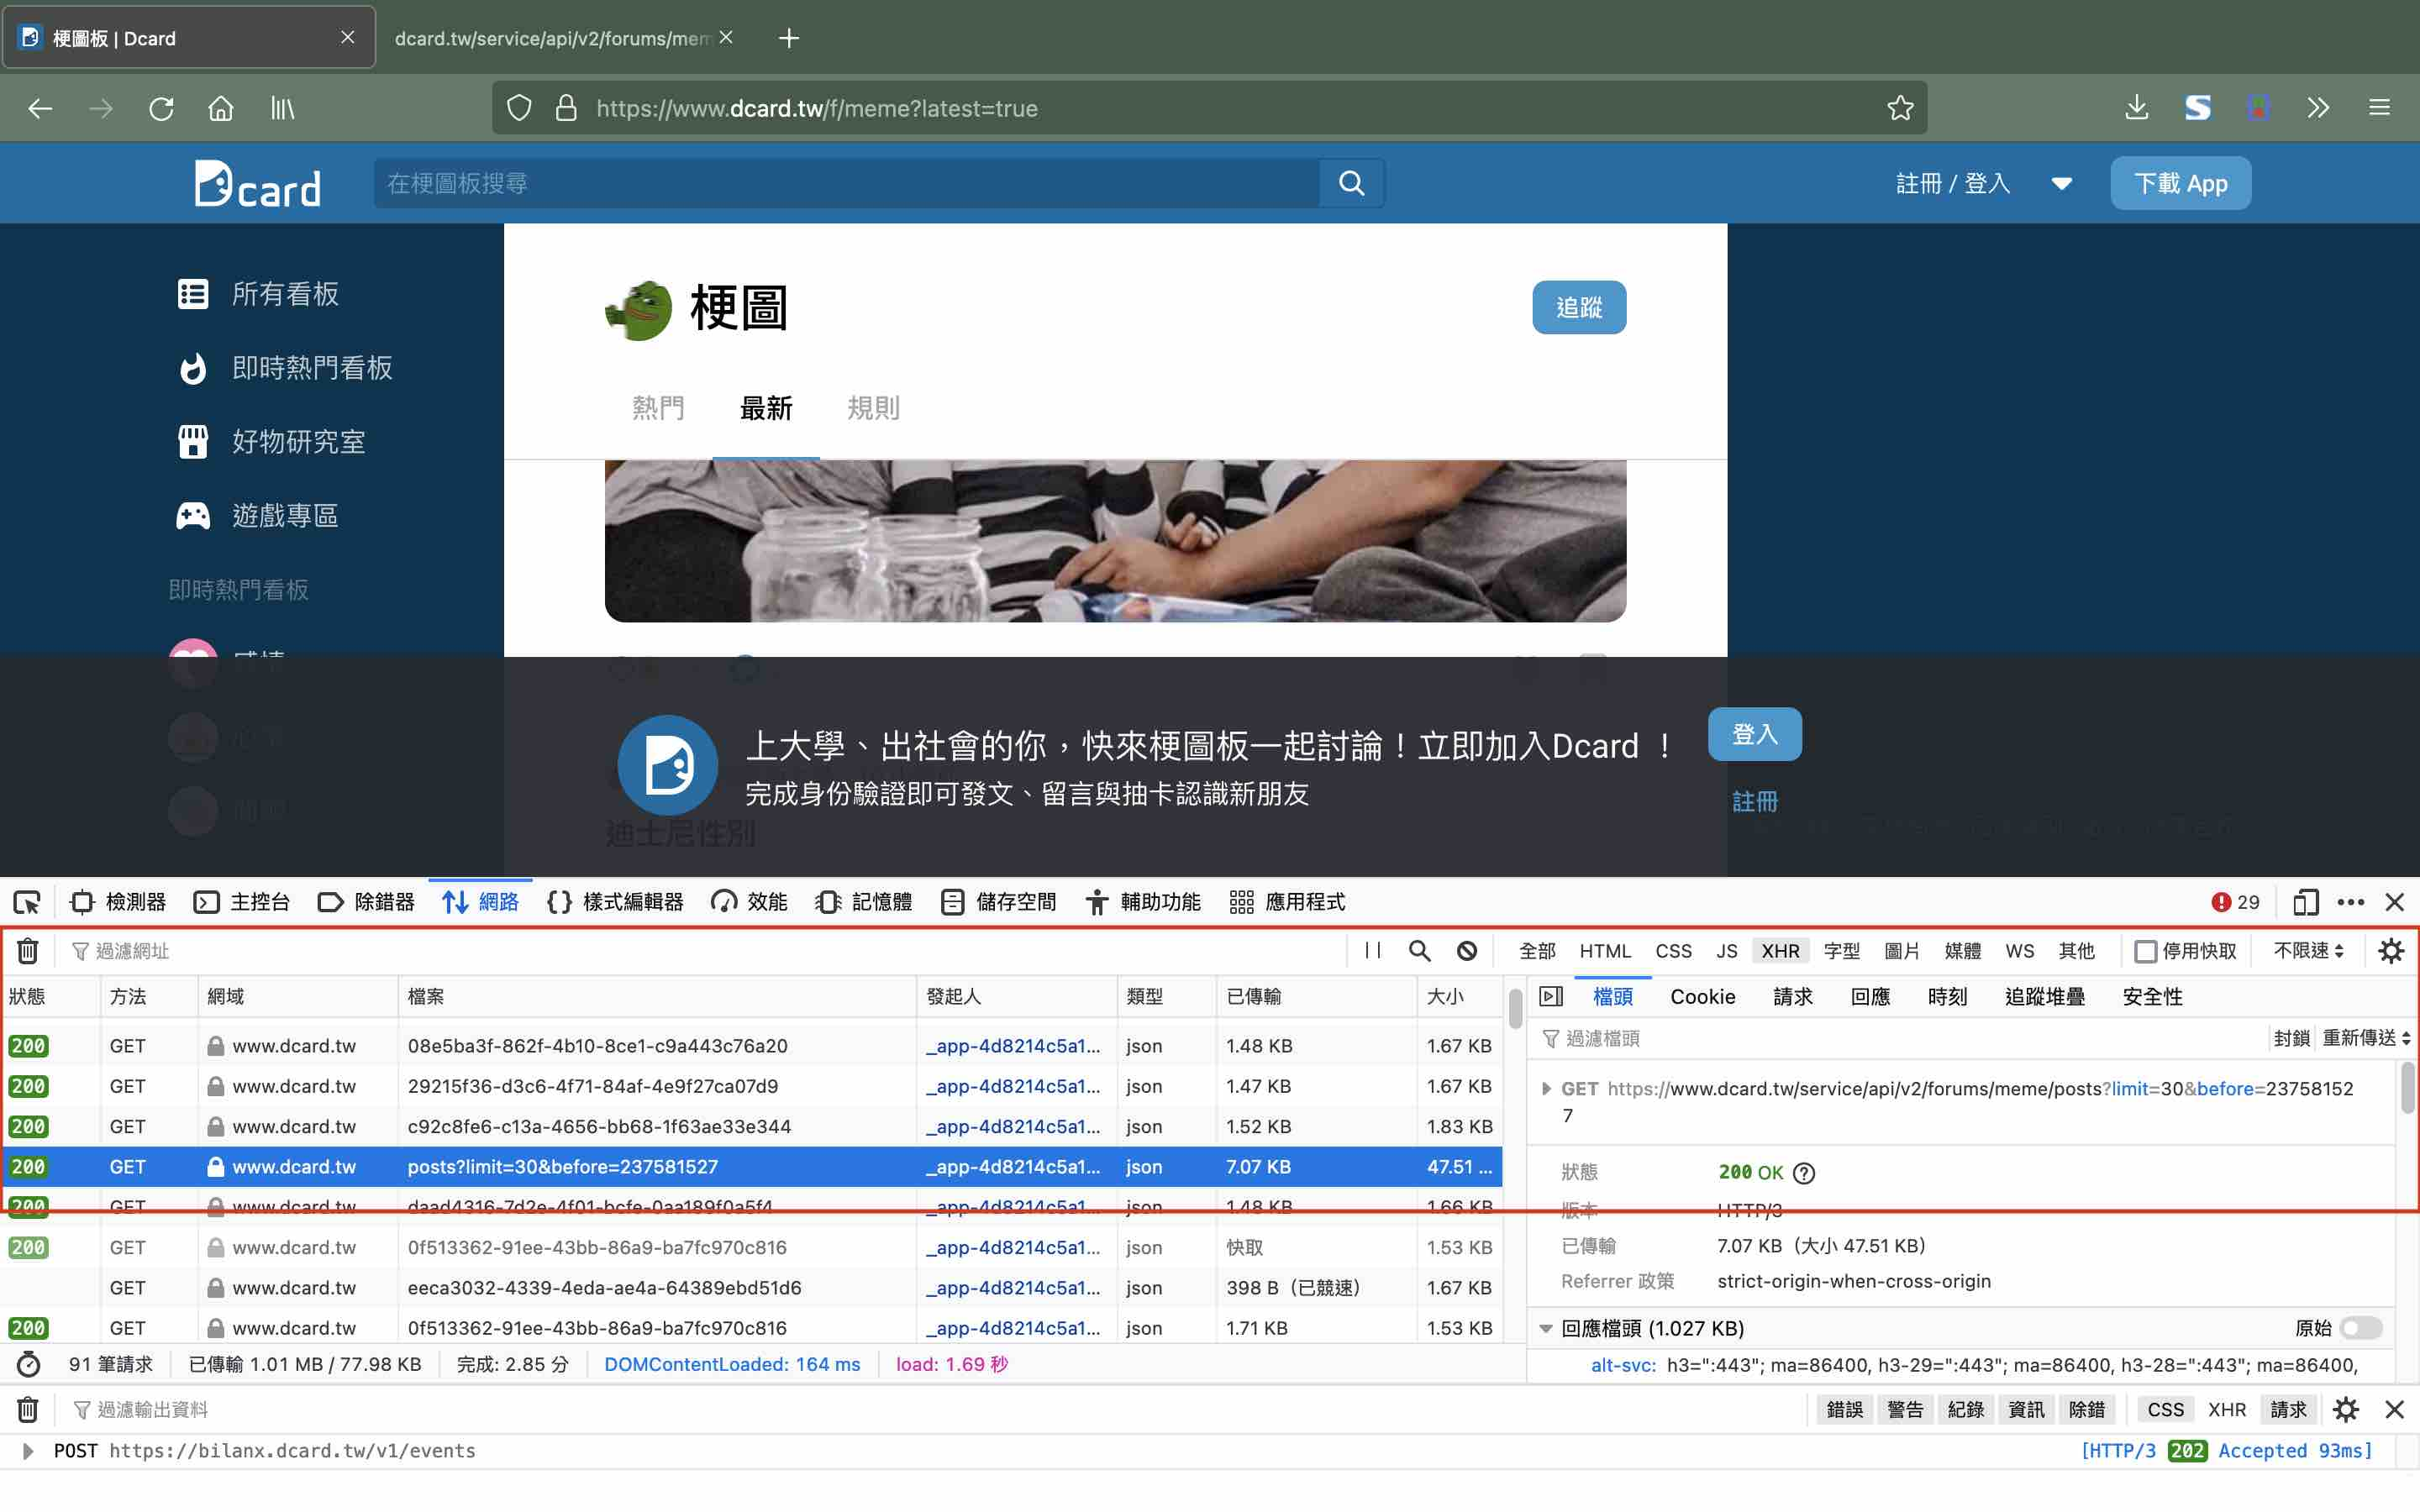

In [2]:
import requests

"""
sample api url: https://www.dcard.tw/service/api/v2/forums/meme/posts?limit=30&before=237584942
從api結構可以推論，在每次只能取得30篇文的狀況下，可利用文章id來取得更久以前的post

"""

user_agent_dcard = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36"
headers = {
    'User-Agent': user_agent_dcard
}

next_post_id = 0  # 往回算的post_id
all_data = []

for p in range(5):
    # 第一個爬取的頁面不用指定post_id
    if p == 0:
        url_dcard = 'https://www.dcard.tw/service/api/v2/forums/meme/posts?limit=30'

    # 第二個爬取的頁面開始指定post_id
    else:
        url_dcard = 'https://www.dcard.tw/service/api/v2/forums/meme/posts?limit=30&before={}'.format(next_post_id)
        
    data = requests.get(url_dcard, headers = headers).json()
    next_post_id = data[-1]['id']  # 以每一次爬取的最後一篇的的post作為下一次爬取的起始點
    all_data += data

print(len(all_data))

150


## Output verification
以下程式碼是為了檢測同學所交上了的作業是否確實抓到對的資料。通常會用以下幾種方式來確認。
1. 確認資料筆數
2. 找到資料中能夠作為identification的欄位，取`set()`來看看是否和抓到的資料筆數相同。

### 1. Convert your list of dicts into a pandas DataFrame
**MUST** using `df_dcard` as variable name of the pandas Dataframe

In [3]:
import pandas as pd

df_dcard = pd.DataFrame(all_data)


### 2. Print `df_dcard.shape`

In [4]:
df_dcard.shape

(150, 49)

### 3. Print the number of unique id
unique id的數量必須要100以上（包含100）

In [5]:
print(len(set(df_dcard.id)))

150


In [6]:
%whos

Variable           Type         Data/Info
-----------------------------------------
all_data           list         n=150
data               list         n=30
df_dcard           DataFrame                id  ... leade<...>\n[150 rows x 49 columns]
headers            dict         n=1
next_post_id       int          237568737
p                  int          4
pd                 module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
requests           module       <module 'requests' from '<...>es/requests/__init__.py'>
url_dcard          str          https://www.dcard.tw/serv<...>limit=30&before=237572581
user_agent_dcard   str          Mozilla/5.0 (Macintosh; I<...>5.0.4638.54 Safari/537.36


# Crawler 02: cnyer
- 設計爬蟲去爬取鉅亨網的新聞（https://news.cnyes.com/news/cat/headline?exp=a）。
- 目標是爬取100則不重複的新聞
- 必須用for-loop迴圈爬取，不得分開爬取多個不同的網址。

### 參考解法

如下圖所示，我們可以透過觀察網站找到可以爬的api（紅框處）


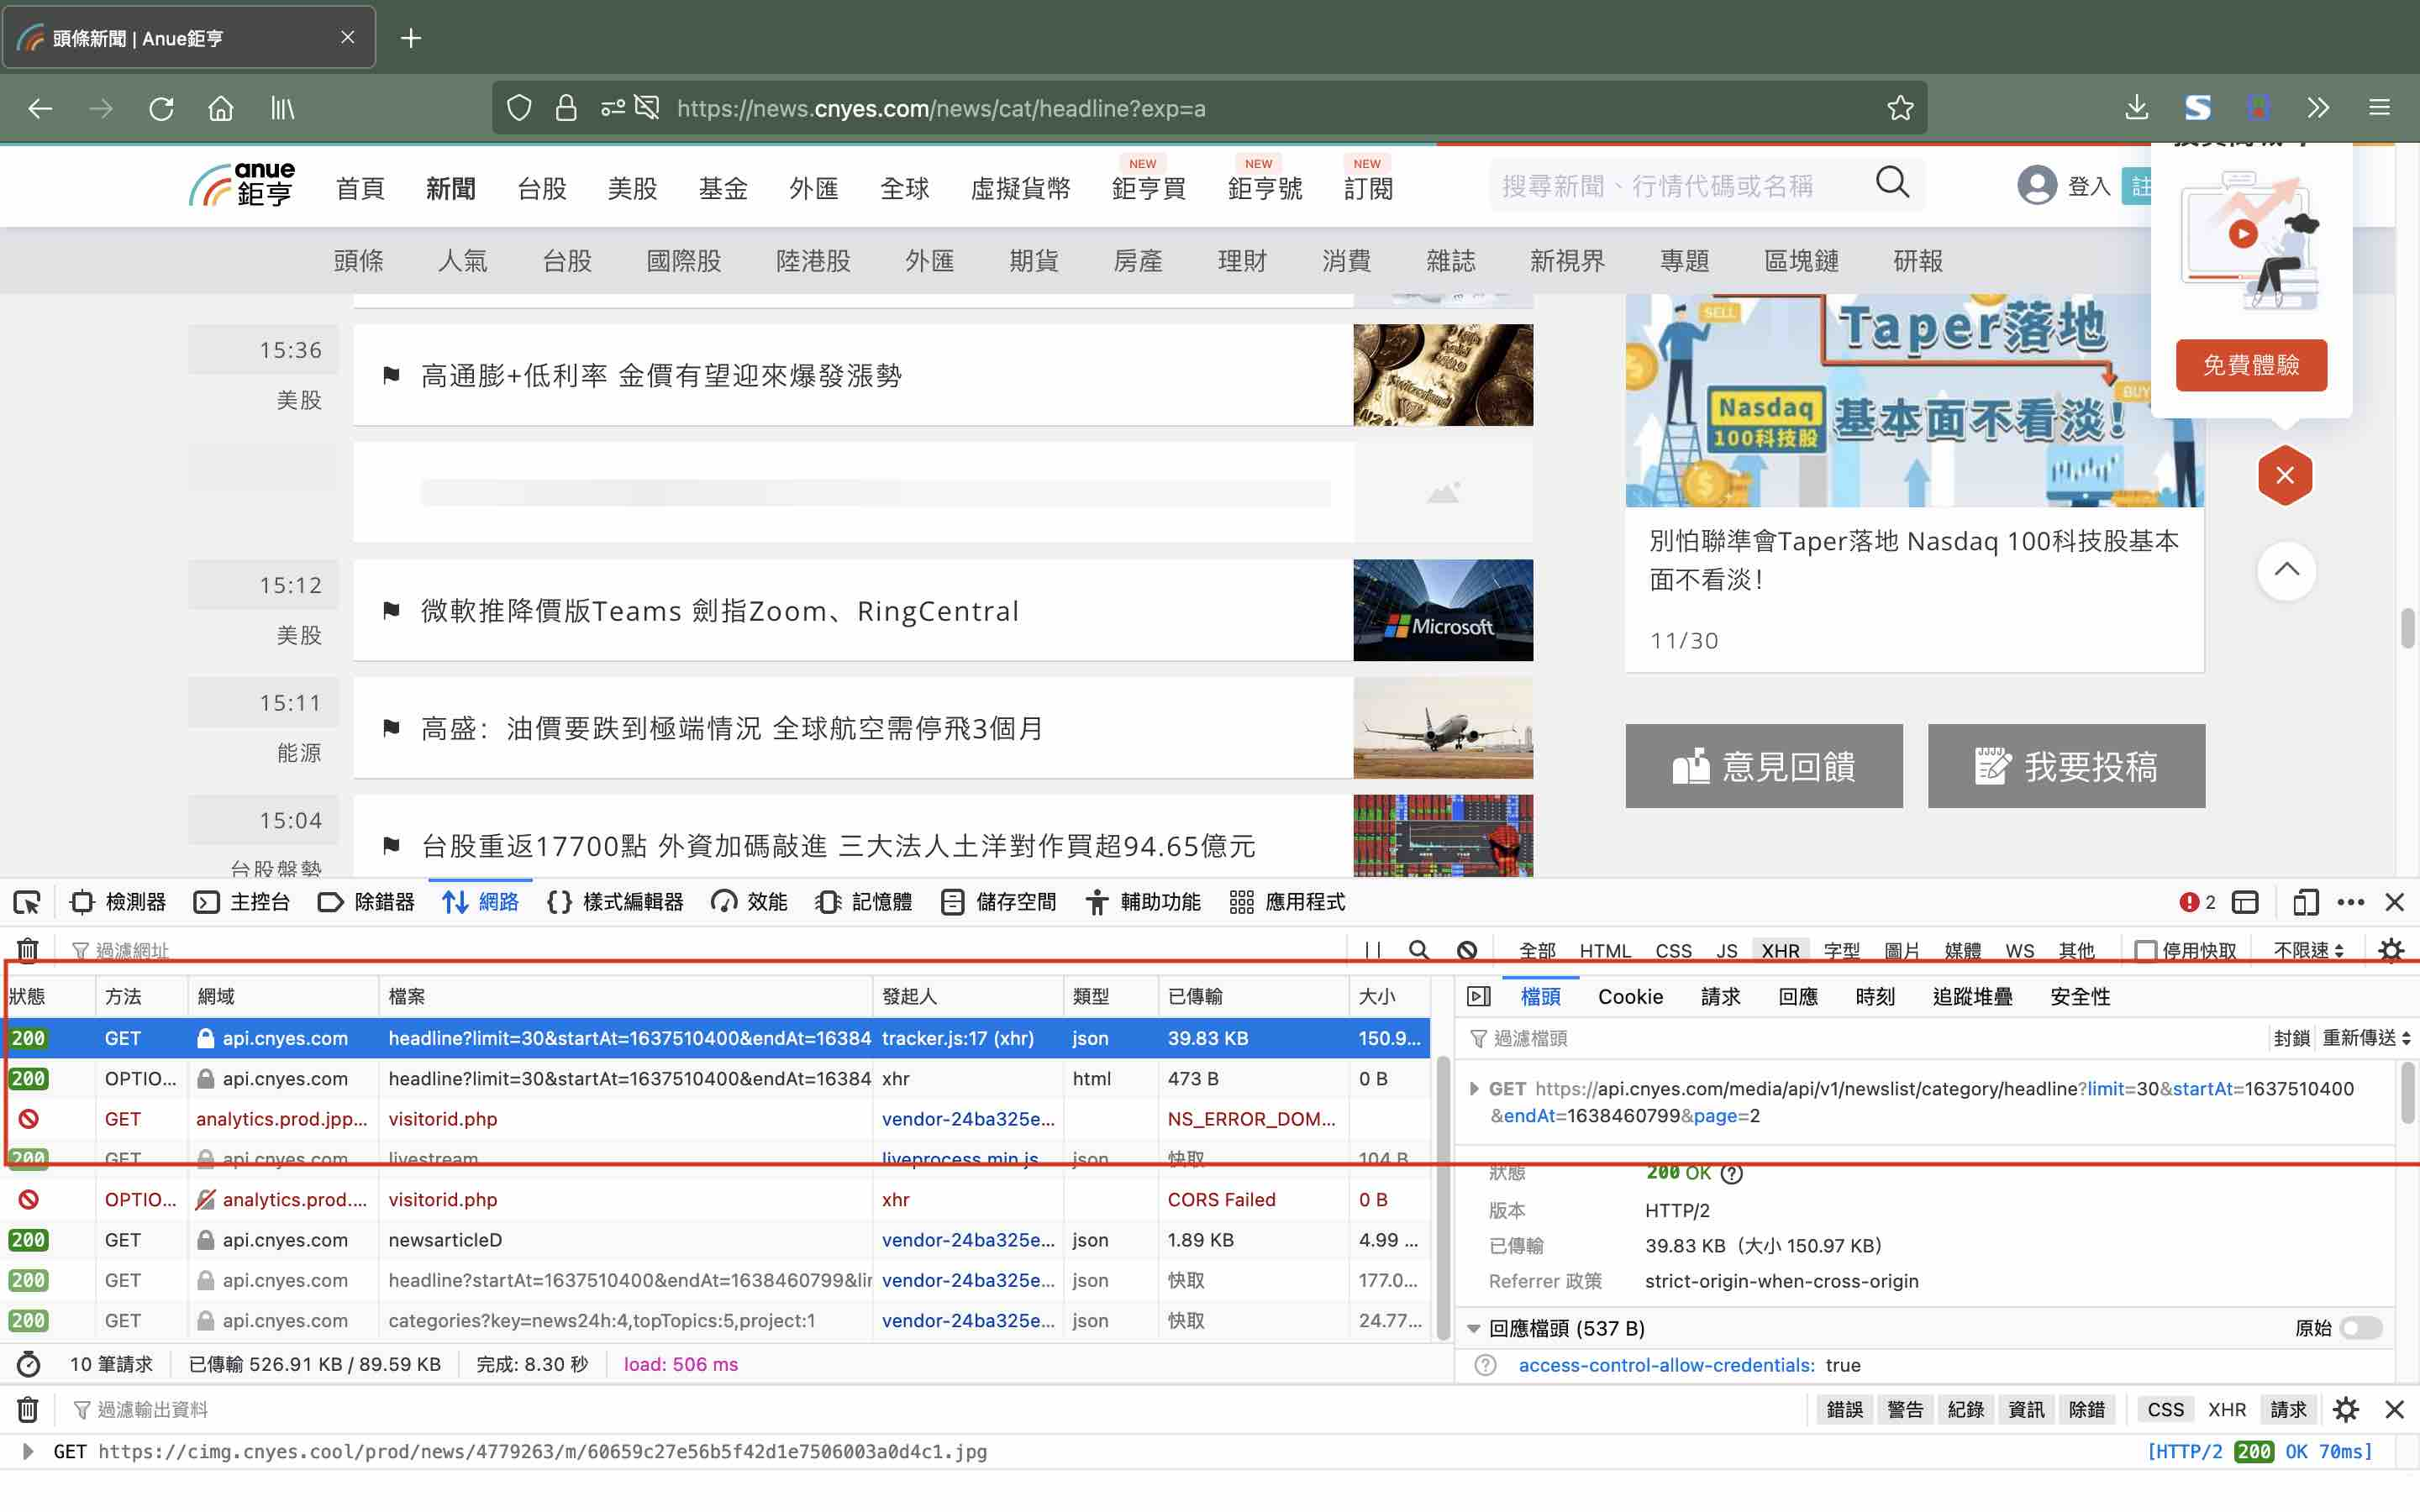

In [7]:
"""
sample api url: https://api.cnyes.com/media/api/v1/newslist/category/headline?limit=30&startAt=1637510400&endAt=1638460799&page=2
從api結構可以推論，在每次只能取得30篇文的狀況下，可利用page來取得更多的post

"""

user_agent_dcard = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36"
headers = {
    'User-Agent': user_agent_dcard
}

all_data = []

for page in range(5):
    url_cnyes = 'https://api.cnyes.com/media/api/v1/newslist/category/headline?limit=30&page={}'.format(page)   
    data = requests.get(url_cnyes, headers = headers).json()
    if data['statusCode'] == 200:
        all_data += data['items']['data']
    else:
        pass

print(len(all_data))


120


## Output Verification

### 1. Convert your list of dicts into a pandas DataFrame
**MUST** using `df_cnyes` as variable name of the pandas Dataframe

In [8]:
df_cnyes = pd.DataFrame(all_data)

### 2. Print `df_cnyes.shape()`

In [9]:
df_cnyes.shape

(120, 22)

### 3. Print the number of unique id
unique newsId的數量必須要100以上（包含100）

In [10]:
print(len(set(df_cnyes.newsId)))

120
